<a href="https://colab.research.google.com/github/maceyworthington/DataScience-GenAI-Submissions/blob/main/Assignment_3/Seminar_3_COMPLETED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('titanic.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


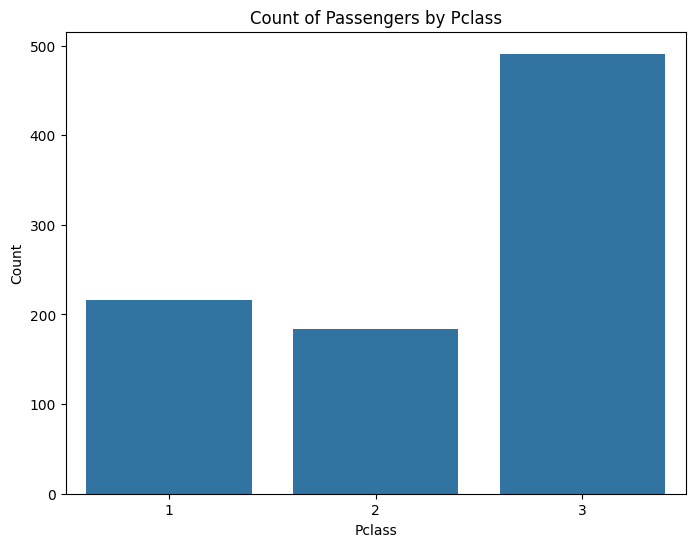

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

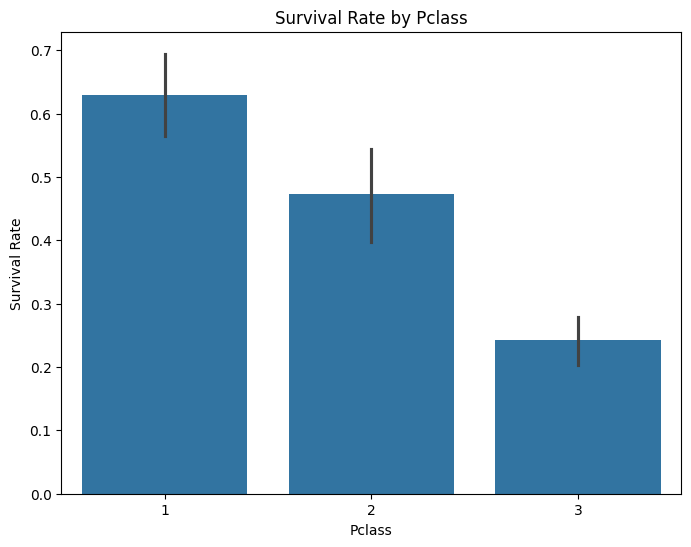

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

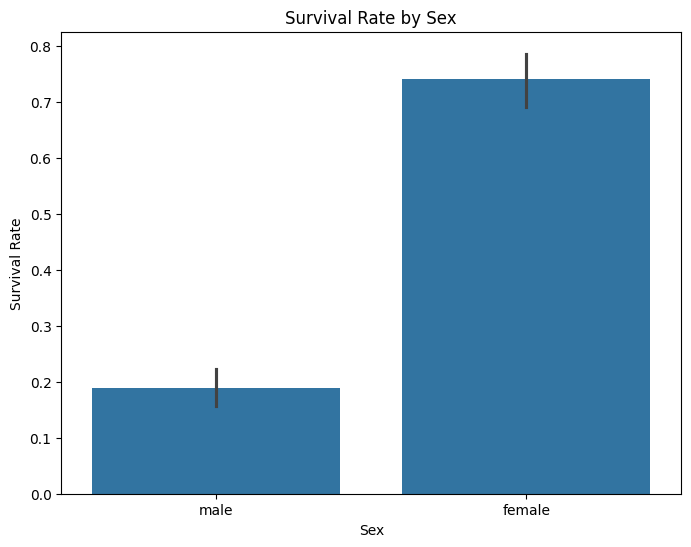

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


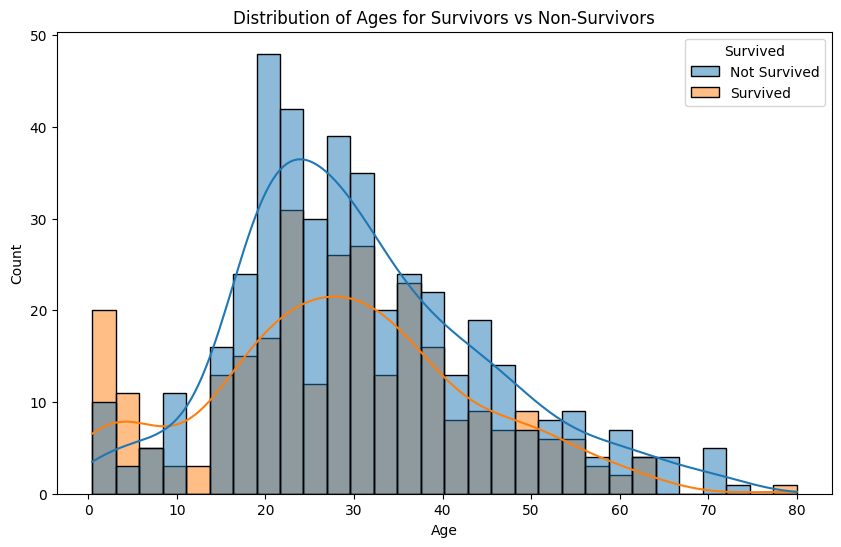

In [ ]:
plt.figure(figsize=(10, 6))
# Create a copy of the DataFrame to avoid modifying the original
df_labeled = df.copy()
# Map the Survived column to descriptive labels
df_labeled['Survived'] = df_labeled['Survived'].map({0: 'Not Survived', 1: 'Survived'})
sns.histplot(data=df_labeled, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribution of Ages for Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Drop rows with missing values in 'Age' and 'Embarked'
df.dropna(subset=['Age', 'Embarked'], inplace=True)

# Drop the 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

# Verify that missing values have been handled
missing_values_after_handling = df.isnull().sum()
print("Missing values after handling:")
print(missing_values_after_handling)

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


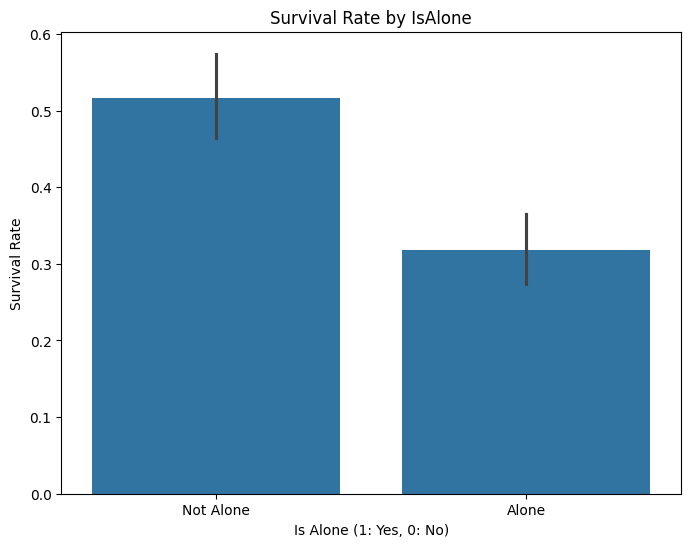

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival Rate by IsAlone')
plt.xlabel('Is Alone (1: Yes, 0: No)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Not Alone', 'Alone'])
plt.show()

In [ ]:
# Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create 'IsAlone' feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

display(df[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())

,SibSp,Parch,FamilySize,IsAlone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1


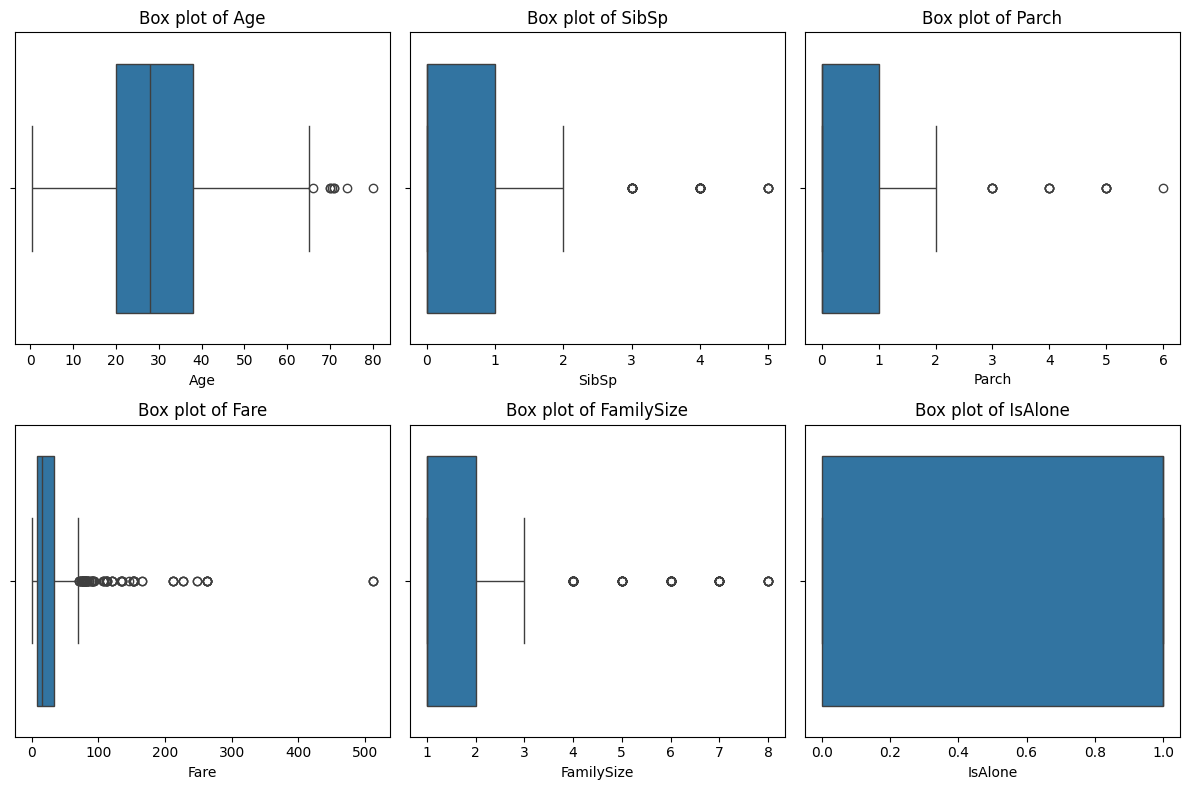

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier detection (excluding 'Survived' and 'PassengerId')
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Survived')
if 'PassengerId' in numerical_cols:
    numerical_cols.remove('PassengerId')
if 'Pclass' in numerical_cols:
    numerical_cols.remove('Pclass') # Pclass is categorical, not numerical for outlier detection

# Create box plots for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [ ]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,1,1
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,1,1


In [ ]:
# Remove outliers using the IQR method
numerical_cols_with_outliers = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize'] # Based on the box plots

for col in numerical_cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed from the dataset.")
print("New dataset shape:", df.shape)

Outliers removed from the dataset.
New dataset shape: (362, 13)
